# MaternAI

# Pregnancy Risk Prediction Using MaternAI

## Project Overview:
Welcome to the **MaternAI** project notebook! In this notebook, we aim to build and evaluate a robust machine learning model that can predict the risk level of a pregnancy based on maternal health data. The model will help identify whether a pregnancy is classified as **Low Risk**, **Medium Risk**, or **High Risk**, enabling timely medical intervention and personalized care.

### Dataset Description:
The analysis will be performed on a maternal dataset that includes the following features:

- **Age**: The age of the individual.
- **Body Temperature (Fahrenheit)**: The recorded body temperature of the individual.
- **Heart Rate (bpm)**: The number of heartbeats per minute.
- **Systolic Blood Pressure (mm Hg)**: The pressure in the arteries when the heart beats.
- **Diastolic Blood Pressure (mm Hg)**: The pressure in the arteries when the heart rests between beats.
- **BMI (kg/m²)**: The body mass index, a measure of body fat based on height and weight.
- **Blood Glucose (HbA1c)**: The average blood sugar level over the past 2-3 months.
- **Blood Glucose (Fasting Hour, mg/dl)**: The blood glucose level after an overnight fast.
- **Outcome**: The classification for pregnancy risk, with categories as **Low Risk**, **Medium Risk**, or **High Risk**.

### Objective:
The primary objective of this notebook is to:

1. **Perform Exploratory Data Analysis (EDA)**: Gain insights, identify trends, detect anomalies, and understand the relationships between different features.
2. **Preprocess the Data**: Clean and prepare the data for training machine learning models, including scaling and encoding.
3. **Train and Evaluate Multiple Models**: Build different machine learning models, assess their performance, and select the most effective model for predictions.
4. **User Interaction**: Implement an interface for real-time input from users to predict pregnancy risk levels.

### Expected Outcome:
By the end of this project, we aim to have a well-trained predictive model capable of accurately classifying pregnancy risk levels. This model will be able to process user input and provide immediate risk predictions to aid in decision-making.

### Author:
**DEVANSHU KUMAR**  
(Infosys Springboard Intern)

---

*Let's begin with data exploration and analysis to lay the groundwork for our predictive modeling.*


# Importing the dataset

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('pregnancy_risk_prediction_data_set.csv', encoding='ISO-8859-1')
data

Patient ID       Name  Age  Body Temperature(F)   Heart rate(bpm)  \
0        1994601     Moulya   20                  97.5               91   
1        2001562       Soni   45                  97.7               99   
2        2002530   Baishali   29                  98.6               84   
3        2002114  Abhilasha   26                  99.5              135   
4        2002058     Aanaya   38                 102.5               51   
...          ...        ...  ...                   ...              ...   
6098     2002617   Pragalya   24                  96.0              101   
6099     2003332   Jyoshita   38                  96.0               59   
6100     2012649   Mrimnayi   40                 103.3              145   
6101     2010533   Vardhani   21                  99.0              130   
6102     2002215   Nivashni   29                  98.6               84   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
0                                161                              100   
1                                 99                               94   
2                                129                               87   
3                                161                              101   
4                                106                               91   
...                              ...                              ...   
6098                             142                               97   
6099                             129                               94   
6100                             123                               95   
6101                             152                               99   
6102                             136                               80   

      BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  \
0            24.9                    41                                5.8   
1            22.1                    36                                5.7   
2            19.0                    42                                6.4   
3            23.7                    46                                4.5   
4            18.8                    38                                4.3   
...           ...                   ...                                ...   
6098         20.3                    39                                6.7   
6099         20.0                    39                                7.0   
6100         24.6                    36                                5.0   
6101         23.2                    47                                6.6   
6102         24.9                    38                                4.5   

        Outcome  
0     high risk  
1     high risk  
2      mid risk  
3     high risk  
4     high risk  
...         ...  
6098   mid risk  
6099  high risk  
6100  high risk  
6101  high risk  
6102   low risk  

[6103 rows x 11 columns]

# General analysis of the dataset

In [3]:
#checking for the columns in the dataset
data.columns

Index(['Patient ID', 'Name', 'Age', 'Body Temperature(F) ', 'Heart rate(bpm)',
       'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
       'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
       'Blood Glucose(Fasting hour-mg/dl)', 'Outcome'],
      dtype='object')

In [4]:
# deleting the unwanted columns from our dataset
data = data.drop(columns=['Name', 'Patient ID'])
# To verify
data

Age  Body Temperature(F)   Heart rate(bpm)  \
0      20                  97.5               91   
1      45                  97.7               99   
2      29                  98.6               84   
3      26                  99.5              135   
4      38                 102.5               51   
...   ...                   ...              ...   
6098   24                  96.0              101   
6099   38                  96.0               59   
6100   40                 103.3              145   
6101   21                  99.0              130   
6102   29                  98.6               84   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
0                                161                              100   
1                                 99                               94   
2                                129                               87   
3                                161                              101   
4                                106                               91   
...                              ...                              ...   
6098                             142                               97   
6099                             129                               94   
6100                             123                               95   
6101                             152                               99   
6102                             136                               80   

      BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  \
0            24.9                    41                                5.8   
1            22.1                    36                                5.7   
2            19.0                    42                                6.4   
3            23.7                    46                                4.5   
4            18.8                    38                                4.3   
...           ...                   ...                                ...   
6098         20.3                    39                                6.7   
6099         20.0                    39                                7.0   
6100         24.6                    36                                5.0   
6101         23.2                    47                                6.6   
6102         24.9                    38                                4.5   

        Outcome  
0     high risk  
1     high risk  
2      mid risk  
3     high risk  
4     high risk  
...         ...  
6098   mid risk  
6099  high risk  
6100  high risk  
6101  high risk  
6102   low risk  

[6103 rows x 9 columns]

In [5]:
data.shape

(6103, 9)

In [6]:
# Checking for the top data in the dataset
data.head()

Age  Body Temperature(F)   Heart rate(bpm)  Systolic Blood Pressure(mm Hg)  \
0   20                  97.5               91                             161   
1   45                  97.7               99                              99   
2   29                  98.6               84                             129   
3   26                  99.5              135                             161   
4   38                 102.5               51                             106   

   Diastolic Blood Pressure(mm Hg)  BMI(kg/m 2)  Blood Glucose(HbA1c)  \
0                              100         24.9                    41   
1                               94         22.1                    36   
2                               87         19.0                    42   
3                              101         23.7                    46   
4                               91         18.8                    38   

   Blood Glucose(Fasting hour-mg/dl)    Outcome  
0                                5.8  high risk  
1                                5.7  high risk  
2                                6.4   mid risk  
3                                4.5  high risk  
4                                4.3  high risk

In [7]:
# checking for the bottom data in the dataset
data.tail()

Age  Body Temperature(F)   Heart rate(bpm)  \
6098   24                  96.0              101   
6099   38                  96.0               59   
6100   40                 103.3              145   
6101   21                  99.0              130   
6102   29                  98.6               84   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
6098                             142                               97   
6099                             129                               94   
6100                             123                               95   
6101                             152                               99   
6102                             136                               80   

      BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  \
6098         20.3                    39                                6.7   
6099         20.0                    39                                7.0   
6100         24.6                    36                                5.0   
6101         23.2                    47                                6.6   
6102         24.9                    38                                4.5   

        Outcome  
6098   mid risk  
6099  high risk  
6100  high risk  
6101  high risk  
6102   low risk

In [8]:
#checking for the null values in the dataset
data.isnull().any()

Age                                  False
Body Temperature(F)                  False
Heart rate(bpm)                      False
Systolic Blood Pressure(mm Hg)       False
Diastolic Blood Pressure(mm Hg)      False
BMI(kg/m 2)                          False
Blood Glucose(HbA1c)                 False
Blood Glucose(Fasting hour-mg/dl)    False
Outcome                              False
dtype: bool

In [9]:
# Checking for the number of duplicated rows
num_duplicates = data.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")


Number of duplicated rows: 1


In [10]:
# checking for the duplicate values in the dataset

# Check for duplicated rows
duplicates = data.duplicated()

# Display rows that are duplicated
print(data[duplicates])

      Age  Body Temperature(F)   Heart rate(bpm)  \
3537   24                  98.6               75   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
3537                             126                               90   

      BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  \
3537         19.0                    37                                5.9   

       Outcome  
3537  low risk  


In [11]:
# Remove duplicated rows
data = data.drop_duplicates()

In [12]:
# Count the number of duplicated rows
num_duplicates = data.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")


Number of duplicated rows: 0


In [13]:
# getting the overall summary of the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6102 entries, 0 to 6102
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                6102 non-null   int64  
 1   Body Temperature(F)                6102 non-null   float64
 2   Heart rate(bpm)                    6102 non-null   int64  
 3   Systolic Blood Pressure(mm Hg)     6102 non-null   int64  
 4   Diastolic Blood Pressure(mm Hg)    6102 non-null   int64  
 5   BMI(kg/m 2)                        6102 non-null   float64
 6   Blood Glucose(HbA1c)               6102 non-null   int64  
 7   Blood Glucose(Fasting hour-mg/dl)  6102 non-null   float64
 8   Outcome                            6102 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 476.7+ KB


In [14]:
#generating a summary of the key statistical properties of the columns in a DataFrame
data.describe()

Age  Body Temperature(F)   Heart rate(bpm)  \
count  6102.000000           6102.000000      6102.000000   
mean     26.425434             98.665585        86.102589   
std       6.390653              1.591113        22.628995   
min      15.000000             39.600000        45.000000   
25%      22.000000             98.600000        72.000000   
50%      25.000000             98.600000        80.000000   
75%      30.000000             98.800000        91.000000   
max     250.000000            104.000000       150.000000   

       Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
count                     6102.000000                      6102.000000   
mean                       129.218781                        87.257129   
std                         17.235580                         7.793659   
min                         90.000000                         9.000000   
25%                        120.000000                        82.000000   
50%                        128.000000                        86.500000   
75%                        141.000000                        92.000000   
max                        169.000000                       142.000000   

       BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  
count  6102.000000           6102.000000                        6102.000000  
mean     21.435980             37.904621                           5.504687  
std       2.157012              4.400617                           0.905387  
min      14.900000             30.000000                           3.500000  
25%      19.600000             34.000000                           4.800000  
50%      21.300000             38.000000                           5.700000  
75%      23.100000             41.000000                           6.000000  
max      27.900000             50.000000                           8.900000

In [15]:
#Checking for the missing values in the dataframe

missing_values=data.isnull().sum()
print(missing_values)

Age                                  0
Body Temperature(F)                  0
Heart rate(bpm)                      0
Systolic Blood Pressure(mm Hg)       0
Diastolic Blood Pressure(mm Hg)      0
BMI(kg/m 2)                          0
Blood Glucose(HbA1c)                 0
Blood Glucose(Fasting hour-mg/dl)    0
Outcome                              0
dtype: int64


# EDA ( Exploratory Data Analysis)

In [16]:
# Basic libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For advanced statistical visualizations

In [17]:
data.columns = data.columns.str.strip()

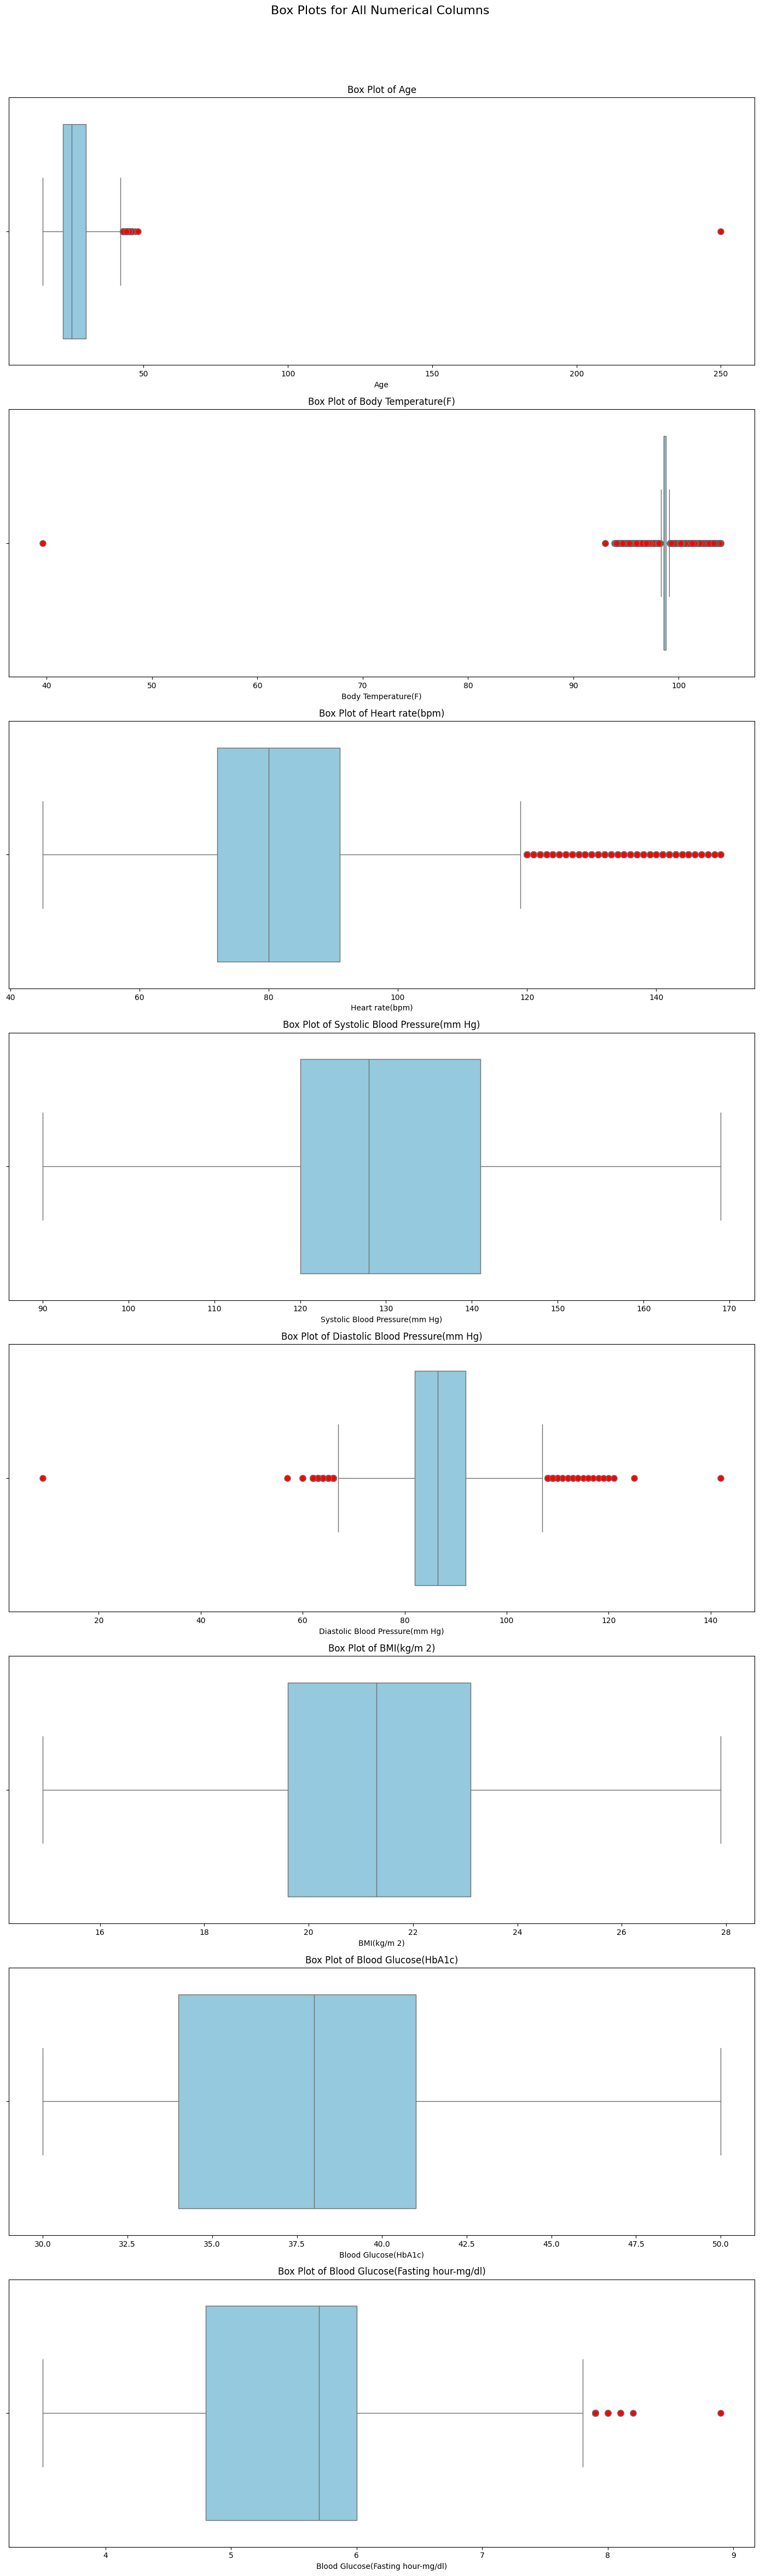

In [18]:
#boxplot for the columns for detecting outliers
# List of numerical columns to create plots for
numerical_columns = ['Age', 'Body Temperature(F)', 'Heart rate(bpm)',
                     'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
                     'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)']

# Define properties for outliers in box plots with a circle marker
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Set up the figure and axes for box plots
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(14, 6 * len(numerical_columns)))
fig.suptitle('Box Plots for All Numerical Columns', fontsize=16)

# Generate box plots for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=data[col], color='skyblue', flierprops=flierprops, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
plt.show()



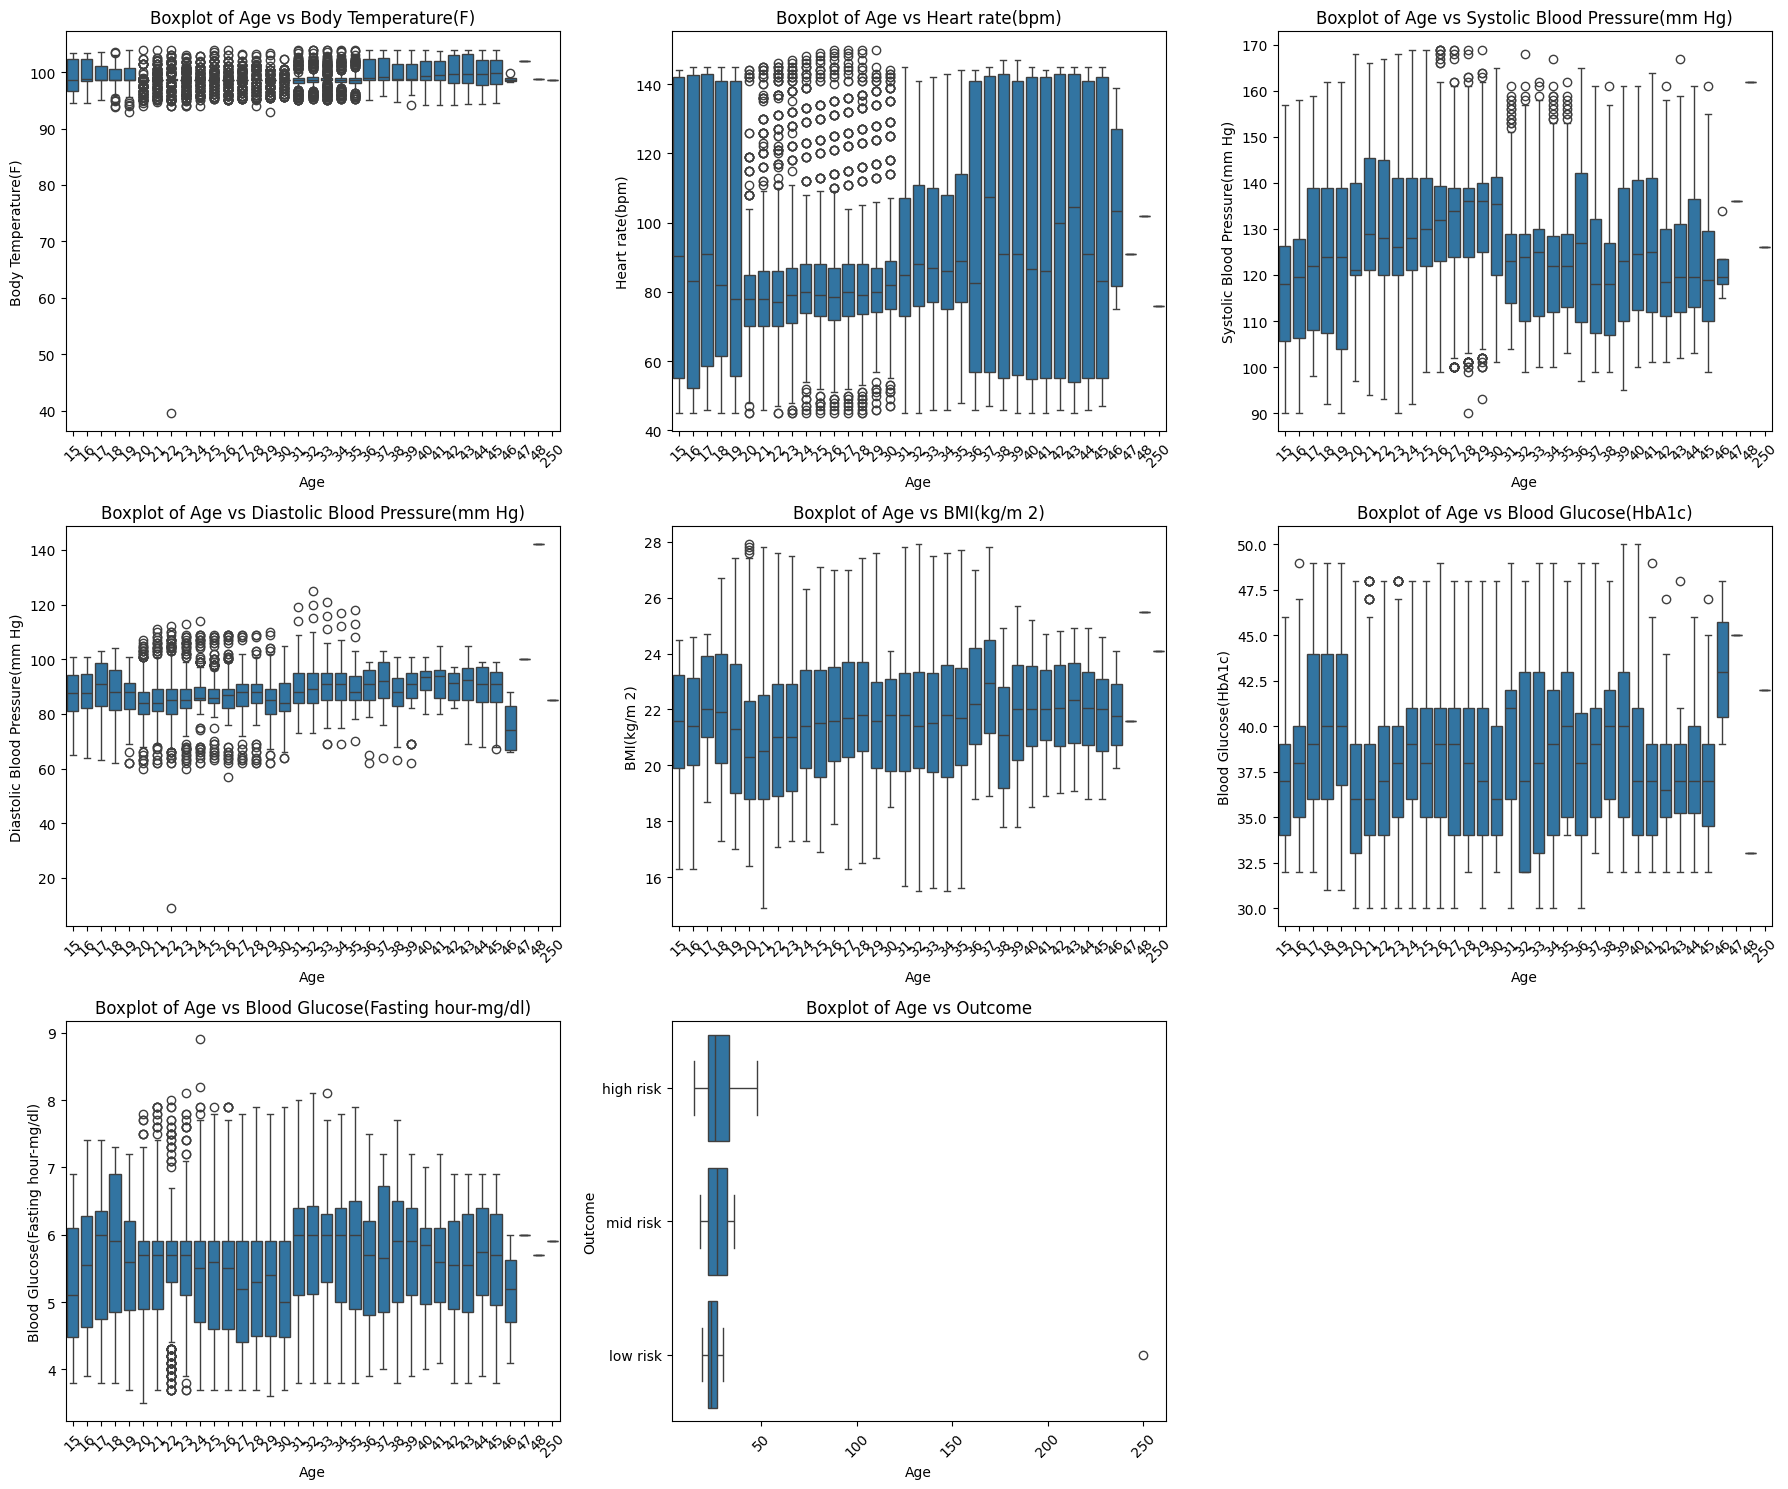

In [19]:
# Box plot for relationship between the variables and the aoutcome

# List of columns to plot against 'Age'
columns_to_plot = [
    'Body Temperature(F)',
    'Heart rate(bpm)',
    'Systolic Blood Pressure(mm Hg)',
    'Diastolic Blood Pressure(mm Hg)',
    'BMI(kg/m 2)',
    'Blood Glucose(HbA1c)',
    'Blood Glucose(Fasting hour-mg/dl)',
    'Outcome'  # Keep Outcome for age vs risk
]

# Create box plots for 'Age' vs each column
plt.figure(figsize=(18, 15))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size as needed
    sns.boxplot(x='Age', y=column, data=data)
    plt.title(f'Boxplot of Age vs {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


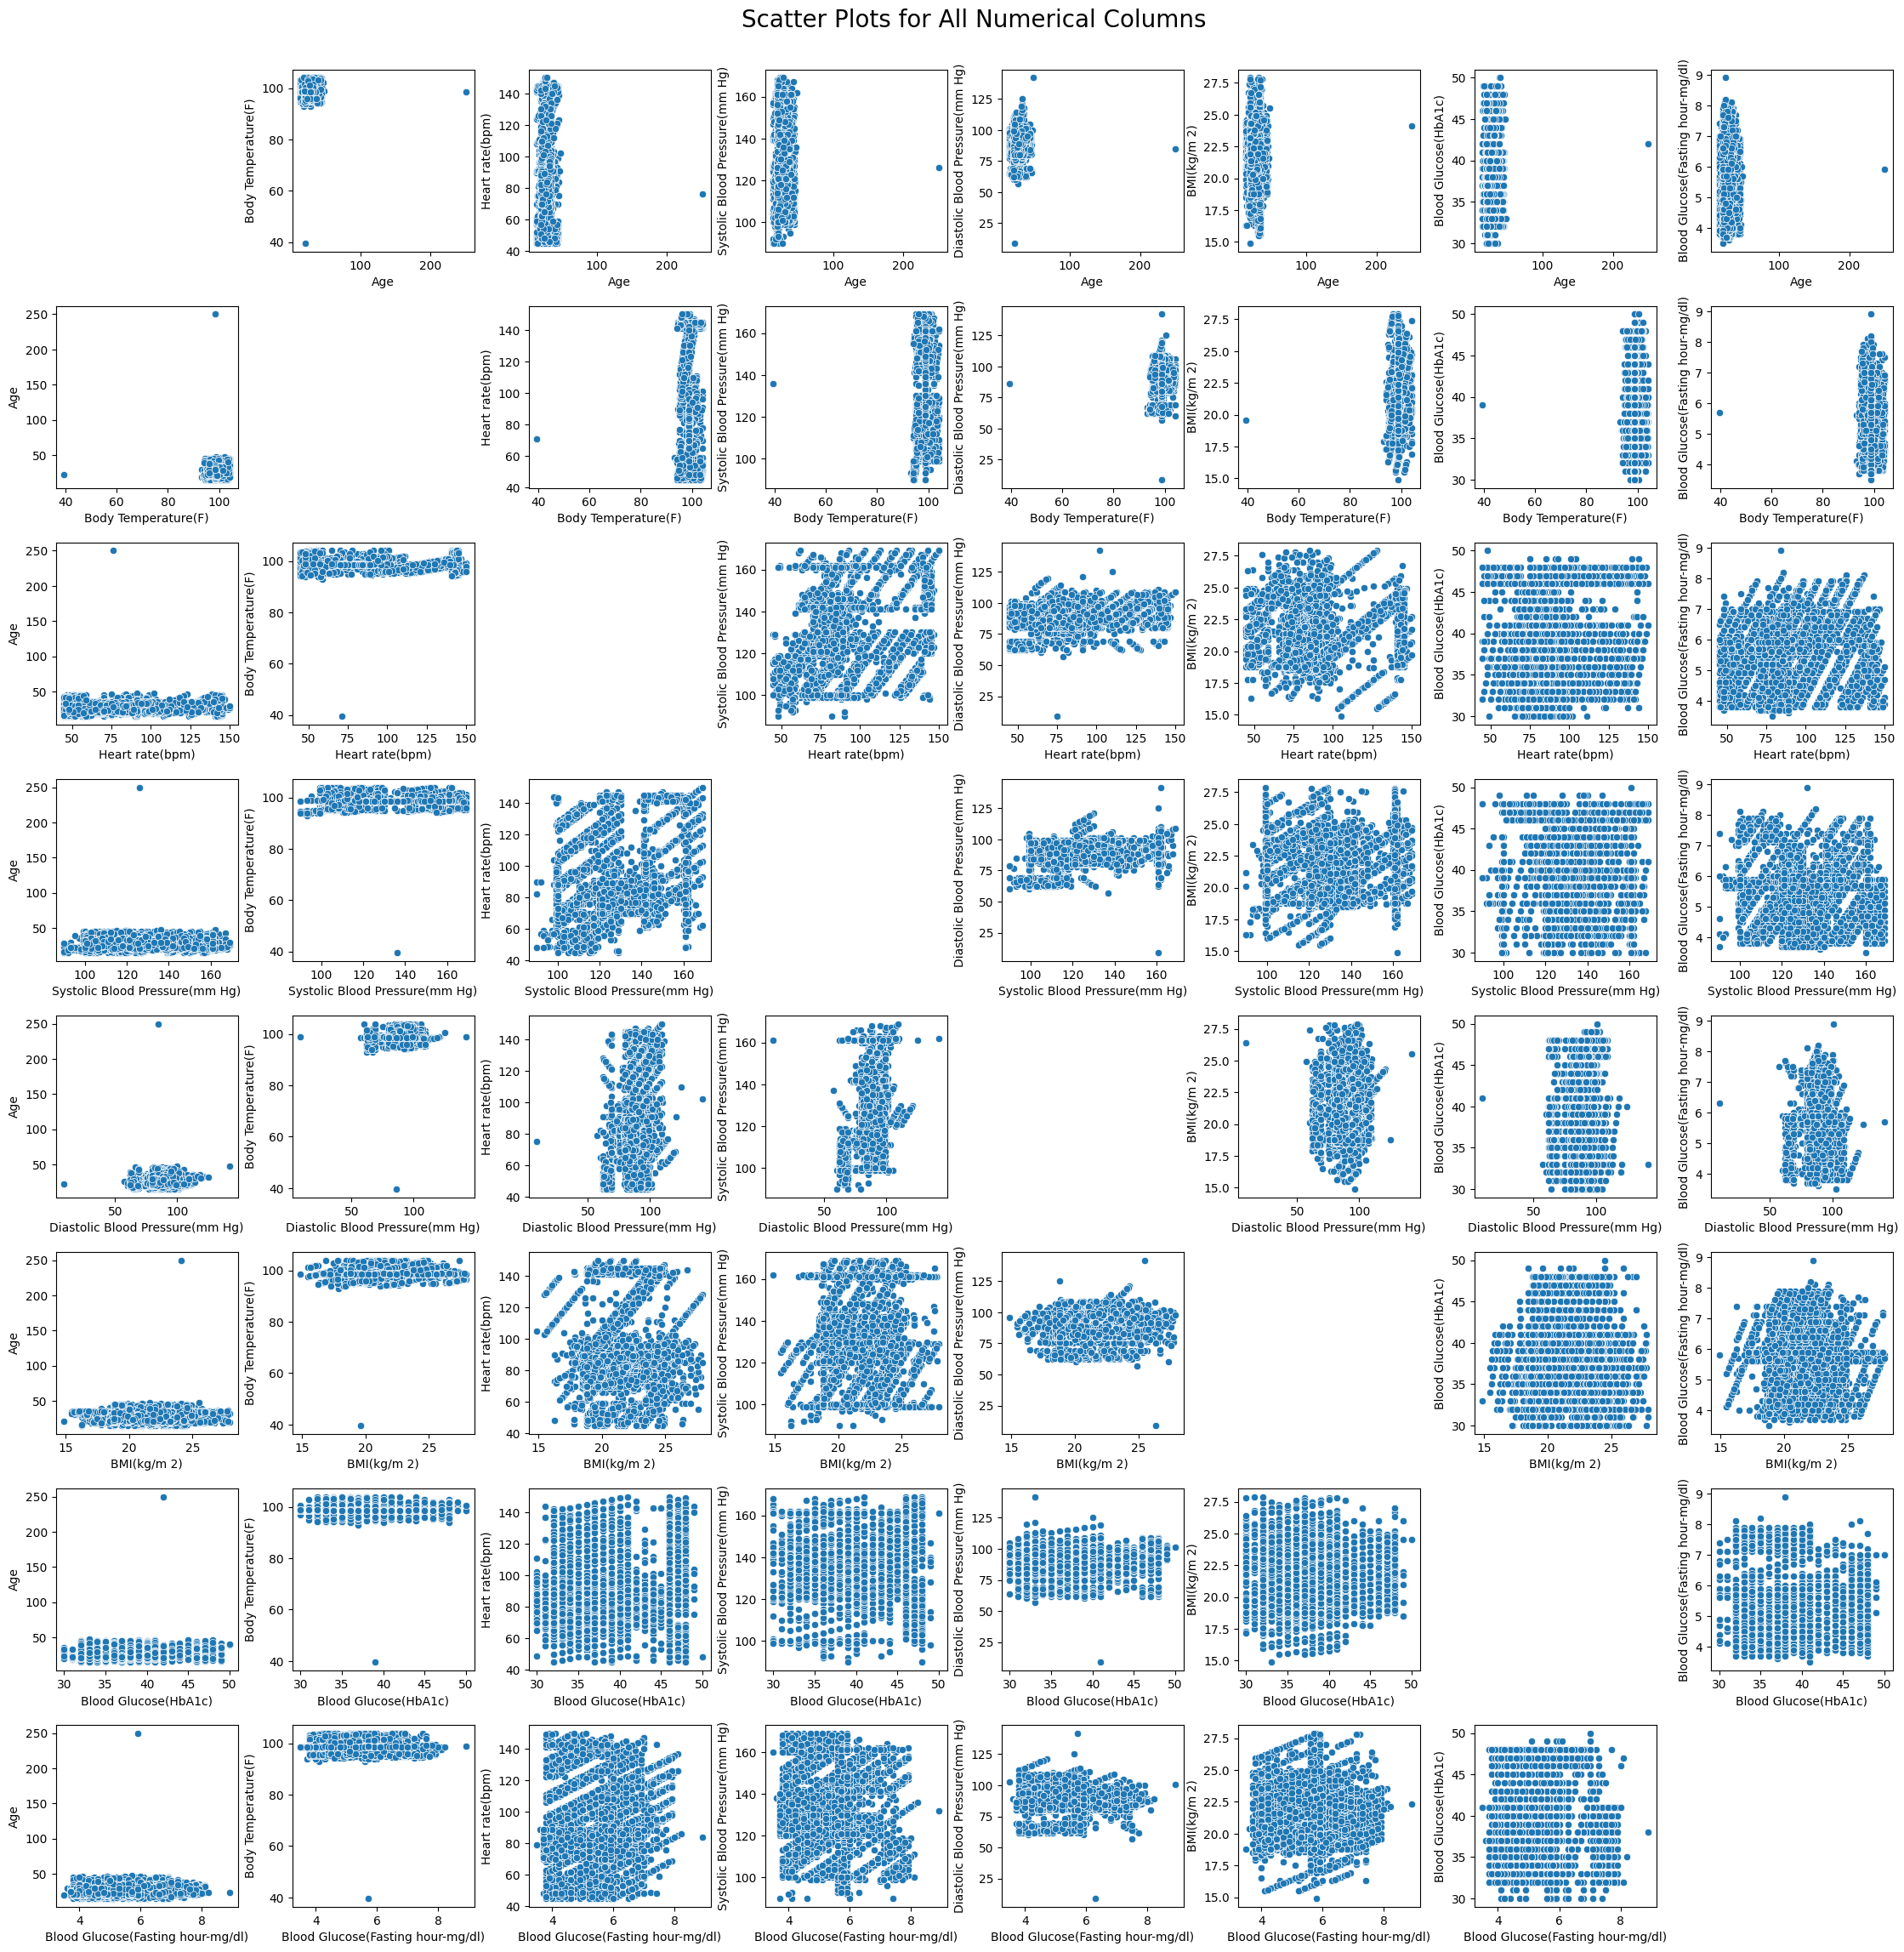

In [20]:
#Scatter plot for the columns in the dataframe

# List of numerical columns to create scatter plots for
numerical_columns = ['Age', 'Body Temperature(F)', 'Heart rate(bpm)',
                     'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
                     'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)']

# Set up a larger figure size for the scatter plots
fig, axes = plt.subplots(len(numerical_columns), len(numerical_columns), figsize=(24, 24))
fig.suptitle('Scatter Plots for All Numerical Columns', fontsize=20)

# Generate scatter plots for each combination of numerical columns
for i in range(len(numerical_columns)):
    for j in range(len(numerical_columns)):
        if i != j:
            sns.scatterplot(x=data[numerical_columns[i]], y=data[numerical_columns[j]], ax=axes[i, j])
            axes[i, j].set_xlabel(numerical_columns[i])
            axes[i, j].set_ylabel(numerical_columns[j])
        else:
            axes[i, j].axis('off')  # Hide the diagonal plots

# Adjust the layout for better spacing
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.3, hspace=0.3)
plt.show()



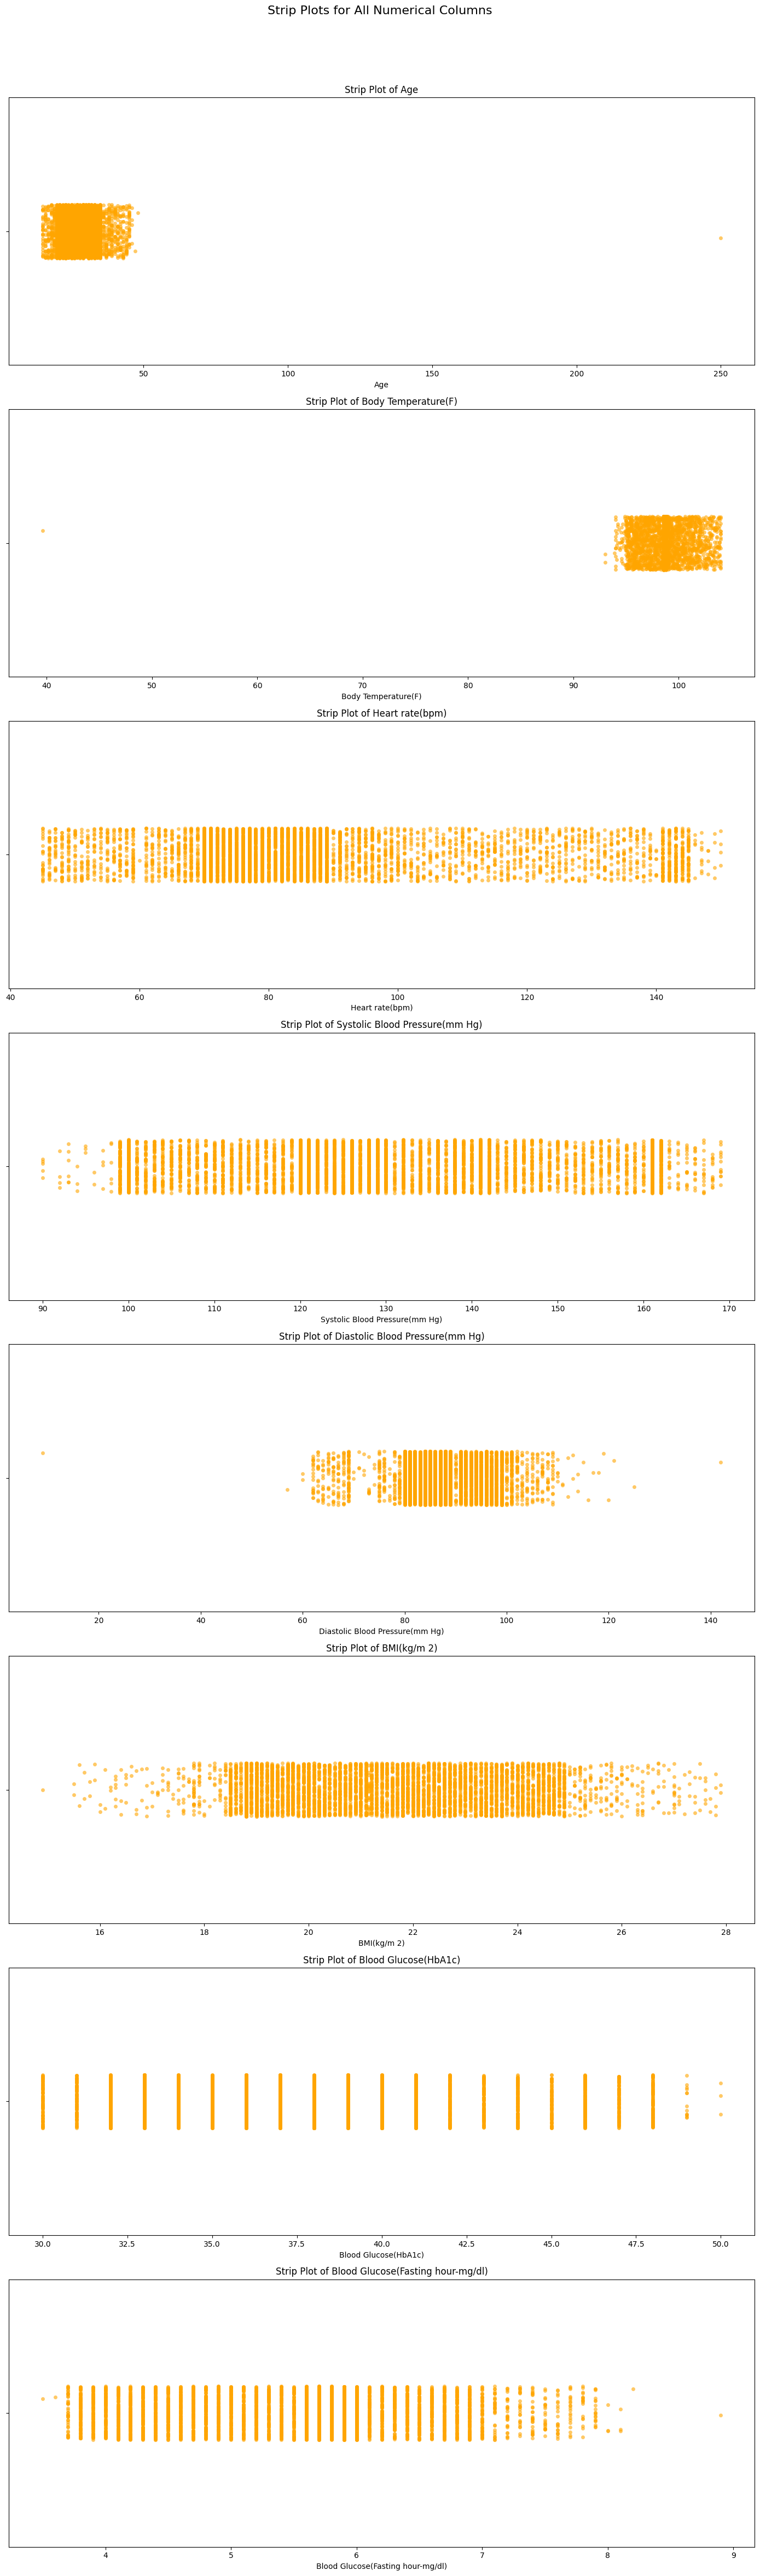

In [21]:
# strip plot for detecting the outliers

# List of numerical columns to create strip plots for
numerical_columns = ['Age', 'Body Temperature(F)', 'Heart rate(bpm)',
                     'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
                     'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)']

# Set up the figure and axes for strip plots
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(14, 6 * len(numerical_columns)))
fig.suptitle('Strip Plots for All Numerical Columns', fontsize=16)

# Generate strip plots for each numerical column
for i, col in enumerate(numerical_columns):
    sns.stripplot(x=data[col], jitter=True, color='orange', alpha=0.6, ax=axes[i])
    axes[i].set_title(f'Strip Plot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
plt.show()


In [22]:
# detecting some big outliers

rows_with_age_above_200 = data[data['Age'] > 200]
rows_with_age_above_200


Age  Body Temperature(F)  Heart rate(bpm)  \
134  250                 98.6               76   

     Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
134                             126                               85   

     BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  \
134         24.1                    42                                5.9   

      Outcome  
134  low risk

In [23]:
Diastolic_BloodPressure_outlier=data[data['Diastolic Blood Pressure(mm Hg)']<20]
Diastolic_BloodPressure_outlier

Age  Body Temperature(F)  Heart rate(bpm)  \
4166   22                 98.8               75   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
4166                             161                                9   

      BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  \
4166         26.4                    41                                6.3   

        Outcome  
4166  high risk

# Removing the Outliers

In [24]:
# Remove rows based on the outlier conditions

data = data[data['Body Temperature(F)'] >= 50]  # Body temperature should be >= 50
data = data[data['Age'] <= 100]  # Age should be <= 100
data = data[data['Diastolic Blood Pressure(mm Hg)'] >= 30]  # Diastolic BP should be >= 30
data = data[data['Diastolic Blood Pressure(mm Hg)'] <= 140]  # Diastolic BP should be <= 140
data = data[data['Blood Glucose(Fasting hour-mg/dl)'] <= 8.5]  # Blood Glucose (Fasting hour) should be <= 8.5
data = data[data['Body Temperature(F)'] >= 94]  # Body temperature should be >= 94

print("DataFrame after removing outliers:")
print(data)


DataFrame after removing outliers:
      Age  Body Temperature(F)  Heart rate(bpm)  \
0      20                 97.5               91   
1      45                 97.7               99   
2      29                 98.6               84   
3      26                 99.5              135   
4      38                102.5               51   
...   ...                  ...              ...   
6098   24                 96.0              101   
6099   38                 96.0               59   
6100   40                103.3              145   
6101   21                 99.0              130   
6102   29                 98.6               84   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
0                                161                              100   
1                                 99                               94   
2                                129                               87   
3                                161                        

# Detecting outliers using IQR method

In [25]:
# Function to find outliers using the IQR method

# List of columns to check for outliers
columns_to_check = [
    'Age',
    'Body Temperature(F)',
    'Heart rate(bpm)',
    'Systolic Blood Pressure(mm Hg)',
    'Diastolic Blood Pressure(mm Hg)',
    'BMI(kg/m 2)',
    'Blood Glucose(HbA1c)',
    'Blood Glucose(Fasting hour-mg/dl)'
]

# Loop through each column to find outliers
for column in columns_to_check:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Outliers in {column}:")
    print(outliers)
    print("\n")


Outliers in Age:
      Age  Body Temperature(F)  Heart rate(bpm)  \
1      45                 97.7               99   
121    43                 97.9              120   
267    44                 97.6              145   
372    45                102.1               49   
388    45                100.1              145   
...   ...                  ...              ...   
5864   44                 98.0              121   
5934   45                 97.7              141   
5957   44                 96.4              144   
6034   43                 99.6              136   
6039   44                103.1               57   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
1                                 99                               94   
121                              116                               98   
267                              120                               81   
372                              109                               88   
388  

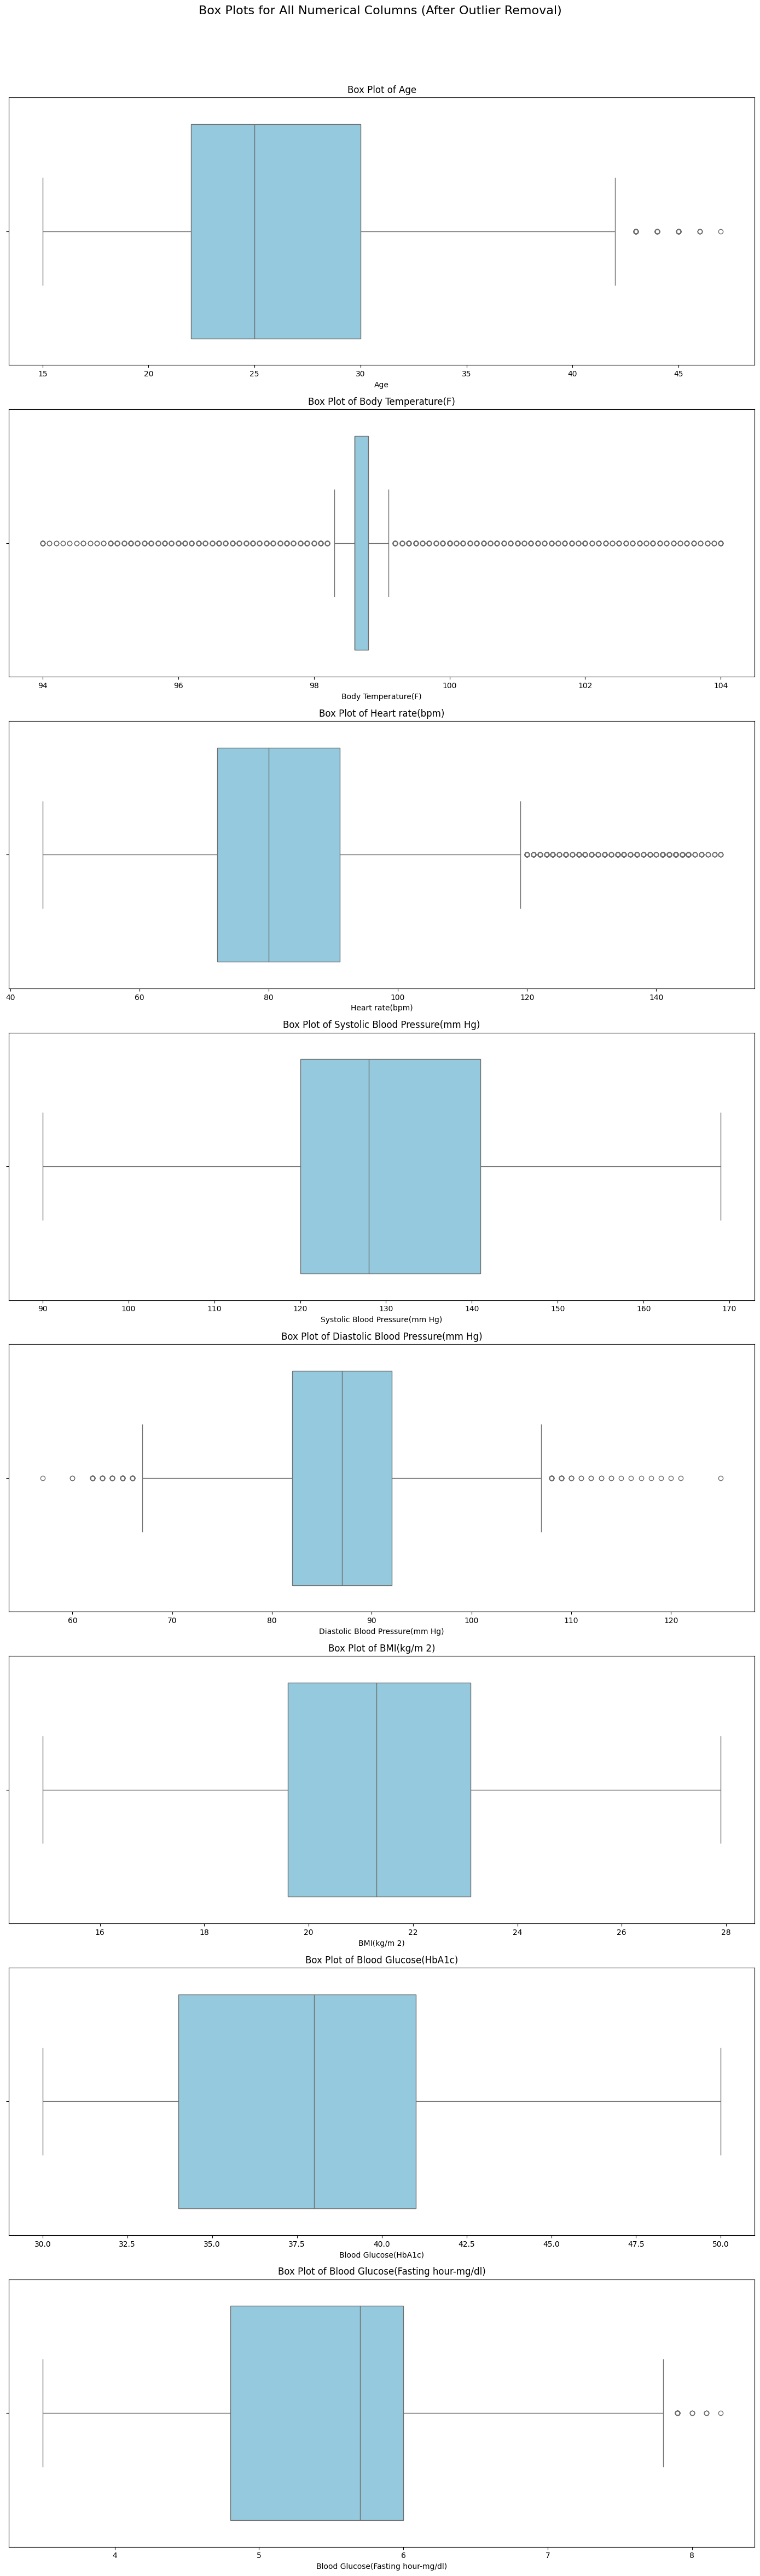

In [26]:
# Box plot after removing the outliers

data = data[data['Body Temperature(F)'] >= 50]
data = data[data['Age'] <= 100]
data = data[data['Diastolic Blood Pressure(mm Hg)'] >= 30]

# List of numerical columns for boxplots
numerical_columns = ['Age', 'Body Temperature(F)', 'Heart rate(bpm)',
                     'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
                     'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)']

# Create the boxplots
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(14, 6 * len(numerical_columns)))
fig.suptitle('Box Plots for All Numerical Columns (After Outlier Removal)', fontsize=16)

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=data[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the suptitle
plt.show()


# Univariate Analysis- kernel density estimation (KDE) plots

Index(['Age', 'Body Temperature(F)', 'Heart rate(bpm)',
       'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
       'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
       'Blood Glucose(Fasting hour-mg/dl)', 'Outcome'],
      dtype='object')


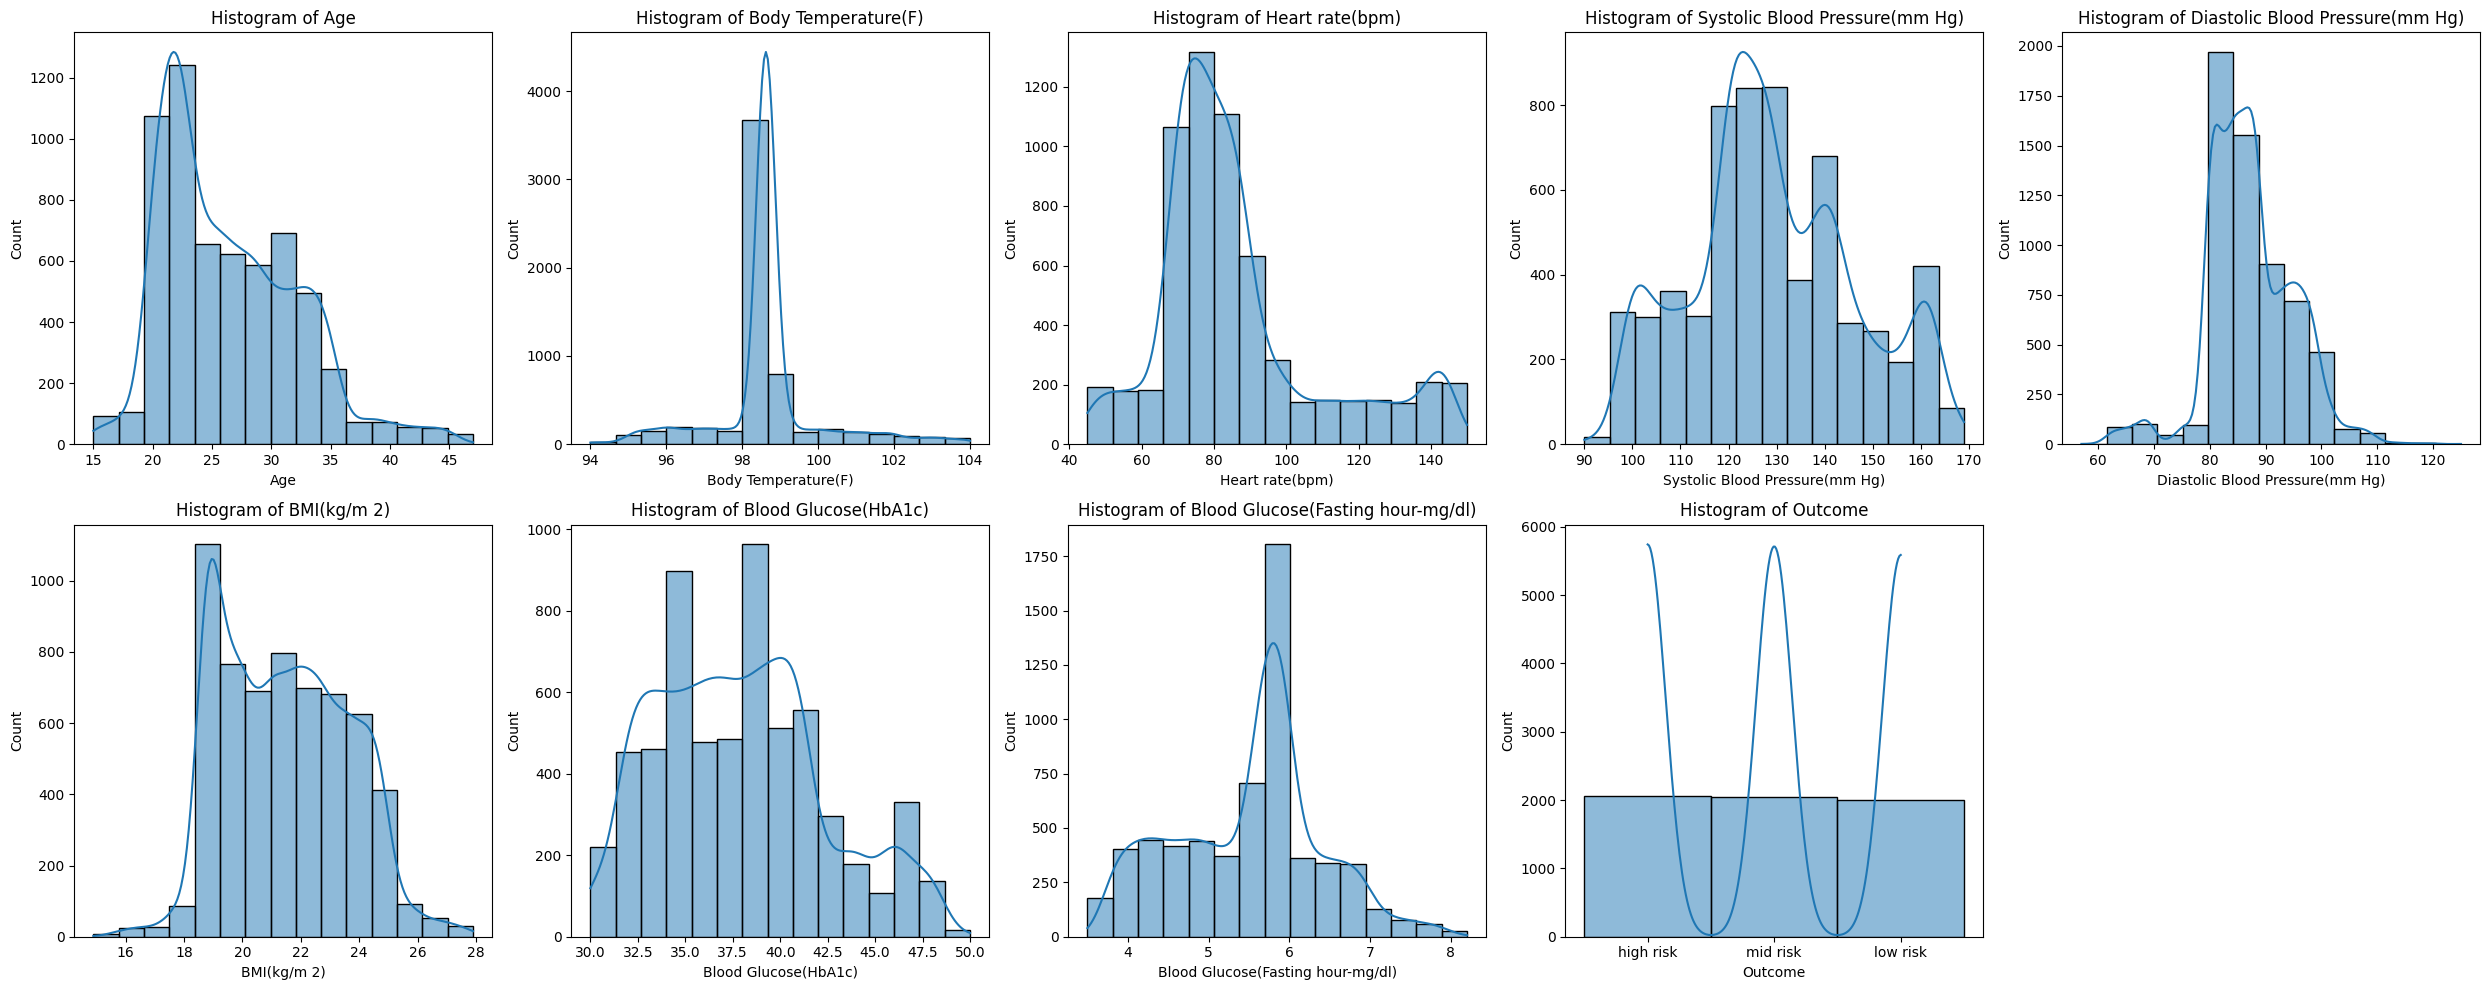

In [27]:
# KDE plot

# List of columns
columns = ['Age', 'Body Temperature(F)', 'Heart rate(bpm)',
           'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
           'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
           'Blood Glucose(Fasting hour-mg/dl)', 'Outcome']

# Print available columns to check for typos or case sensitivity
print(data.columns)

# Number of columns to display (based on how many columns you have)
num_plots = len(columns)

# Define the number of rows and columns for the subplot grid
num_rows = 2
num_cols = int(np.ceil(num_plots / num_rows))  # Automatically calculate the number of columns

# Create subplots with 2 rows and calculated columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

# Flatten axes array if needed (in case the number of plots is less than the grid size)
axes = axes.flatten()

# Loop through each column and plot histogram
for i, col in enumerate(columns):
    # Check if the column exists in the DataFrame before accessing it
    if col in data.columns:
        # Plotting the histogram and KDE
        sns.histplot(data[col], bins=15, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')
    else:
        print(f"Column '{col}' not found in the DataFrame.")
        axes[i].set_title(f"Column '{col}' not found")

# Hide unused axes (if there are fewer columns than subplots)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


# Bivariate analysis- Pair Plot

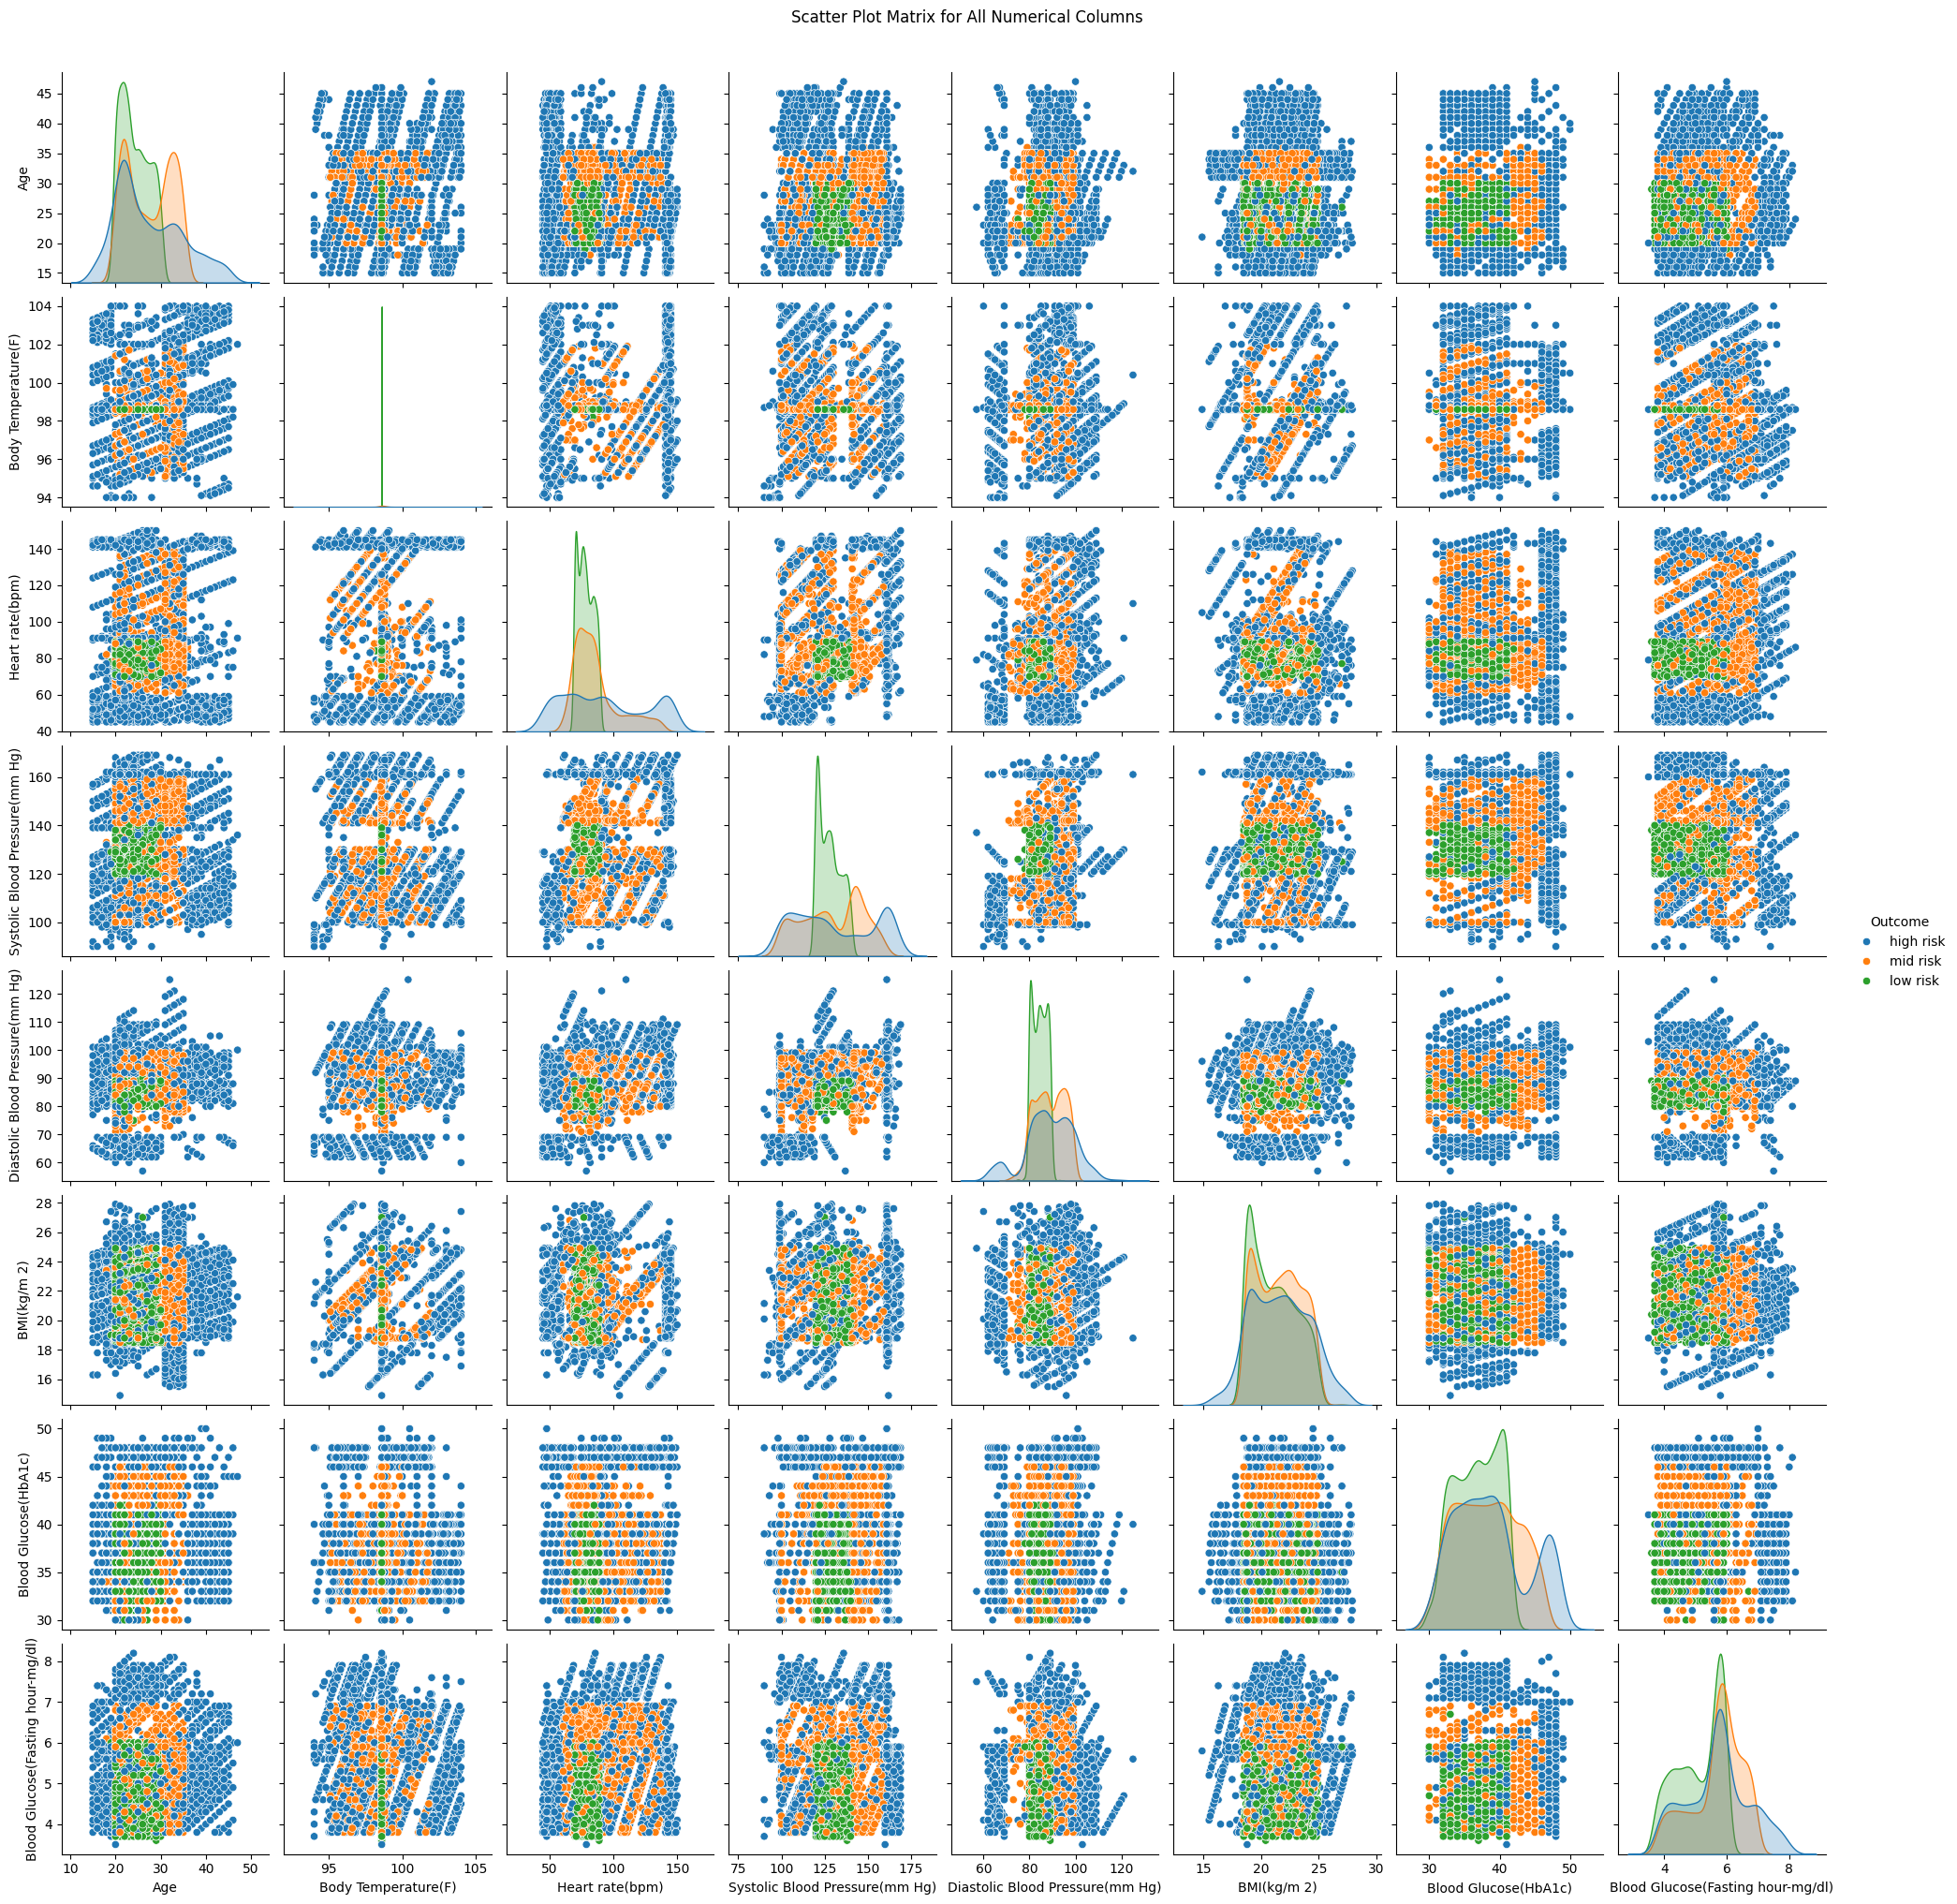

In [28]:
# Bivariate analysis- Scatter plot

numerical_columns = ['Age', 'Body Temperature(F)', 'Heart rate(bpm)',
                     'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
                     'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)']

# Create a pair plot (scatter plot matrix)
sns.pairplot(data=data, vars=numerical_columns, kind='scatter', diag_kind='kde', hue='Outcome')

# Display the plot
plt.suptitle('Scatter Plot Matrix for All Numerical Columns', y=1.02)  # Adjust the title position
plt.show()

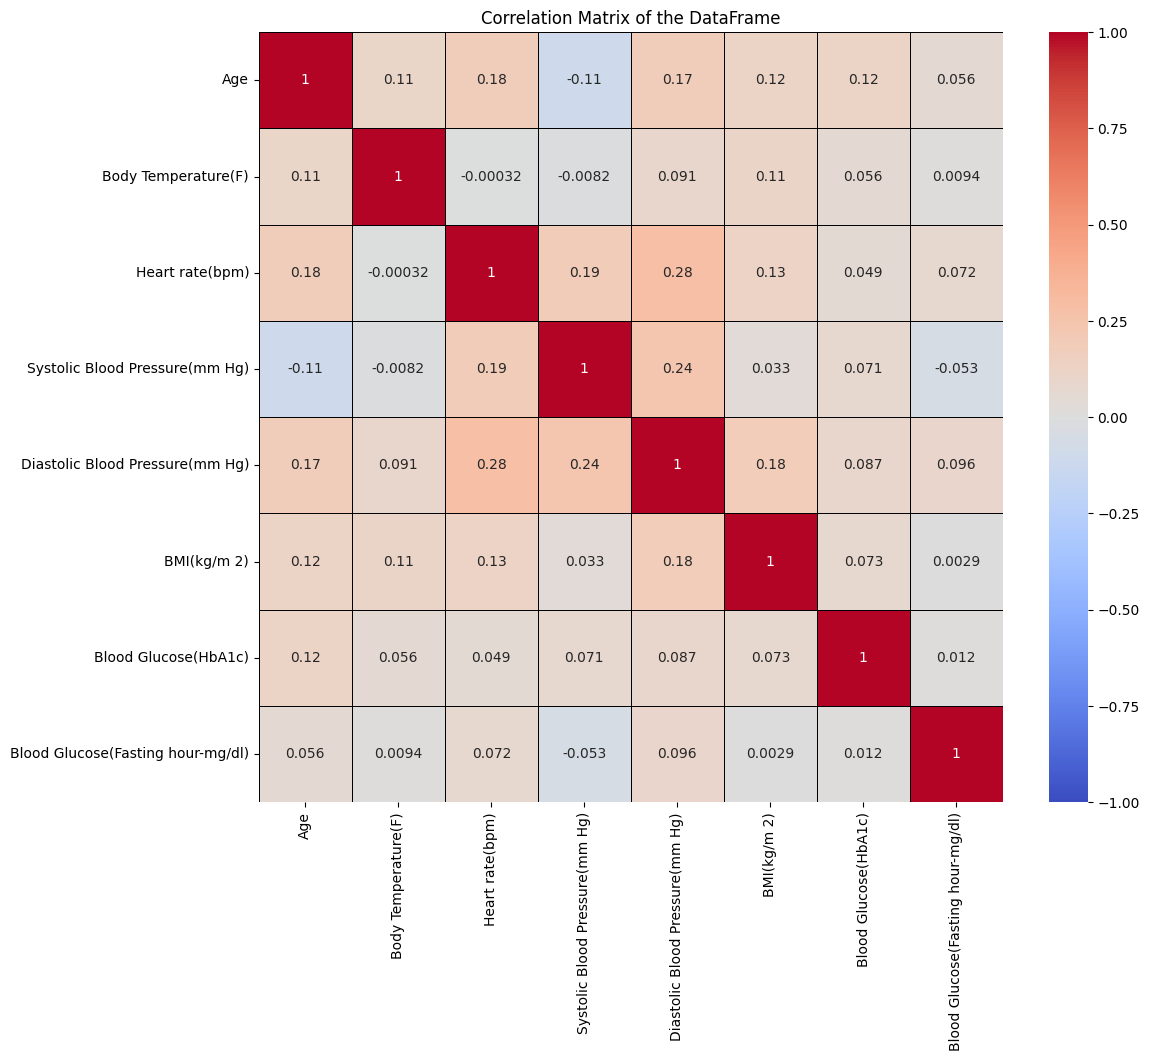

In [29]:
# Correlation matrix

# Calculate the correlation matrix for only numeric columns
correlation_matrix = data.select_dtypes(include=['number']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')

# Add a title
plt.title('Correlation Matrix of the DataFrame')

# Display the heatmap
plt.show()



# Model Building

In [30]:
# important libraries

# Model libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Preprocessing library for scaling
from sklearn.preprocessing import StandardScaler

# Model evaluation and metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [31]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and 'Outcome' is your target column
X = data[['Age', 'Body Temperature(F)', 'Heart rate(bpm)', 
          'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)', 
          'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)']]
y = data['Outcome']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# You can now run the Random Forest code


# 1. Random forest classifier

Random Forest Classifier:
Accuracy Score: 0.9917965545529123

Classification Report:
              precision    recall  f1-score   support

   high risk       1.00      0.99      0.99       407
    low risk       0.99      1.00      1.00       386
    mid risk       0.99      0.99      0.99       426

    accuracy                           0.99      1219
   macro avg       0.99      0.99      0.99      1219
weighted avg       0.99      0.99      0.99      1219


Confusion Matrix:


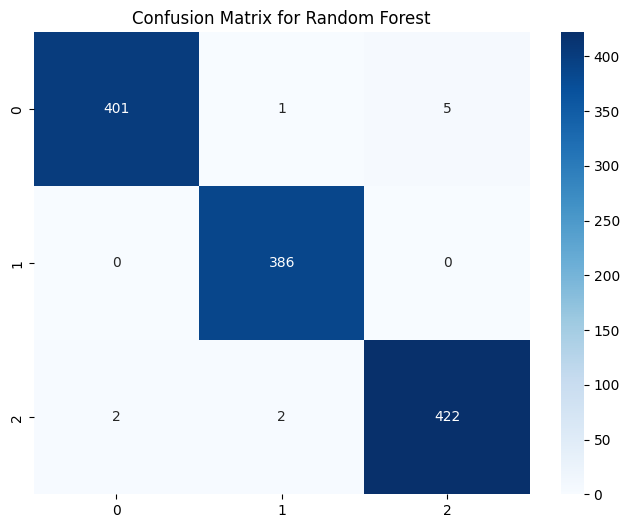

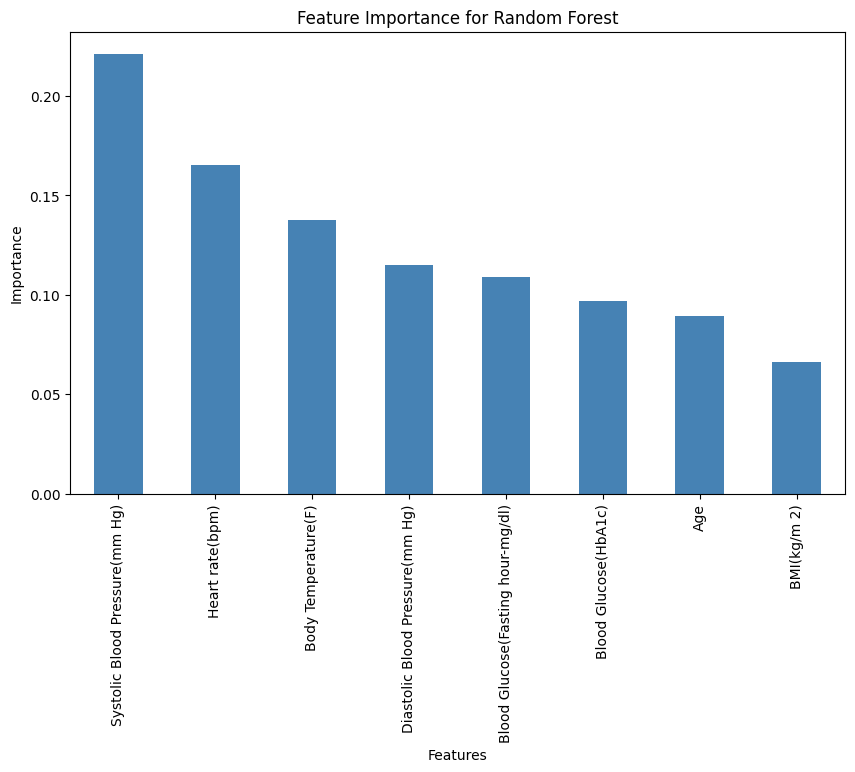

In [32]:
# Random Forest model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation for Random Forest
print("Random Forest Classifier:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Feature importance for Random Forest
feature_importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances_rf.sort_values(ascending=False).plot(kind='bar', color='steelblue')
plt.title('Feature Importance for Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


# 2. K-Nearest Neighbors (KNN)

K-Nearest Neighbors Classifier:
Accuracy Score: 0.8736669401148482

Classification Report:
              precision    recall  f1-score   support

   high risk       0.90      0.77      0.83       407
    low risk       0.91      1.00      0.95       386
    mid risk       0.81      0.86      0.84       426

    accuracy                           0.87      1219
   macro avg       0.88      0.88      0.87      1219
weighted avg       0.88      0.87      0.87      1219


Confusion Matrix:


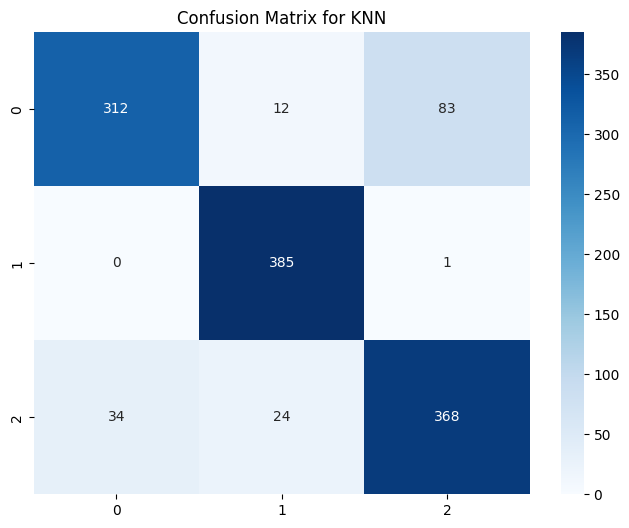

In [33]:
# K-Nearest Neighbors (KNN)

# Create and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluation for KNN
print("K-Nearest Neighbors Classifier:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for KNN")
plt.show()


# 3. Support Vector Machine (SVM)

Support Vector Machine Classifier:
Accuracy Score: 0.7694831829368335

Classification Report:
              precision    recall  f1-score   support

   high risk       0.87      0.70      0.77       407
    low risk       0.75      0.99      0.85       386
    mid risk       0.72      0.64      0.67       426

    accuracy                           0.77      1219
   macro avg       0.78      0.78      0.77      1219
weighted avg       0.78      0.77      0.76      1219


Confusion Matrix:


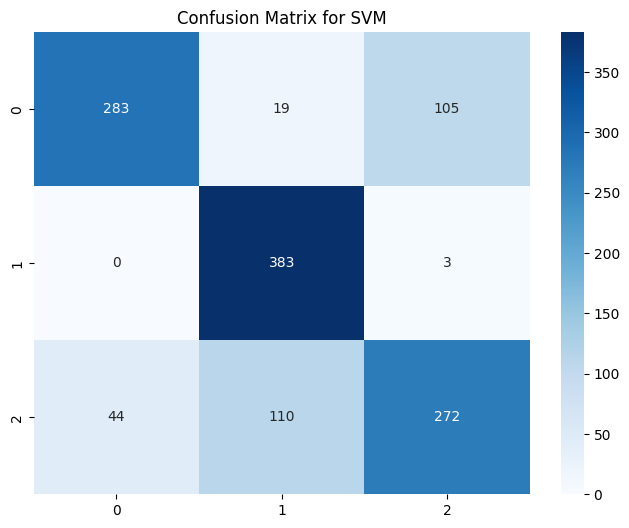

In [34]:
# 3. Support Vector Machine (SVM)

# Create and train the SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluation for SVM
print("Support Vector Machine Classifier:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for SVM")
plt.show()


# 4. XGBoost Classifier

XGBoost Accuracy: 0.99

Classification Report for XGBoost:
              precision    recall  f1-score   support

   high risk       1.00      0.98      0.99       407
    low risk       0.99      1.00      1.00       386
    mid risk       0.99      0.99      0.99       426

    accuracy                           0.99      1219
   macro avg       0.99      0.99      0.99      1219
weighted avg       0.99      0.99      0.99      1219



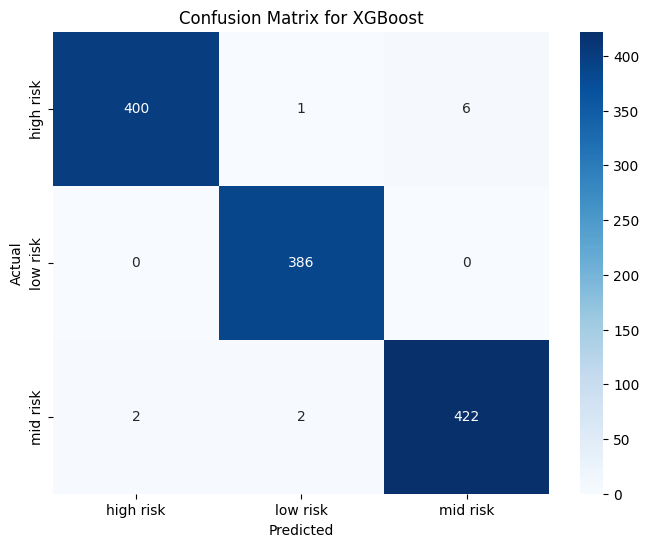

C:\Users\devan\AppData\Local\Temp\ipykernel_7232\819086641.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=X_train.columns, palette='viridis')


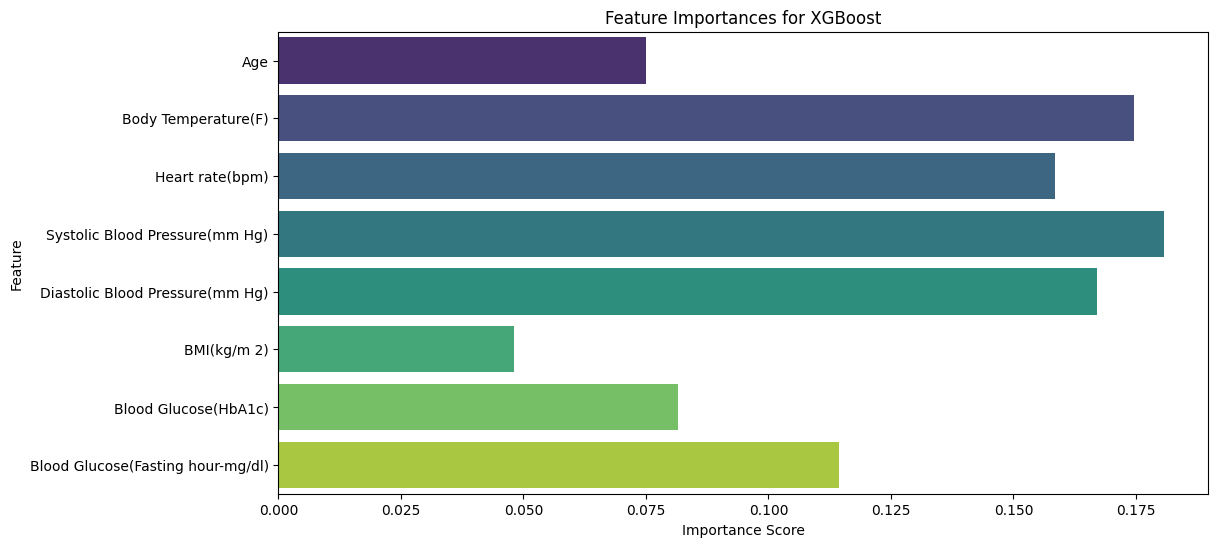

In [35]:
# XGBoost Classifier

from sklearn.preprocessing import LabelEncoder

# Encode the target variable if it's not already numeric
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create and train the XGBoost model
xgb_model = XGBClassifier(eval_metric='mlogloss')  # Removed use_label_encoder as it's deprecated
xgb_model.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation for XGBoost
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print("\nClassification Report for XGBoost:")
print(classification_report(y_test_encoded, y_pred_xgb, target_names=label_encoder.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance Plot
feature_importances = xgb_model.feature_importances_
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=X_train.columns, palette='viridis')
plt.title('Feature Importances for XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


# 5. Logistic Regression

Logistic Regression Classifier:
Accuracy Score: 0.5627563576702215

Classification Report:
              precision    recall  f1-score   support

   high risk       0.60      0.49      0.54       407
    low risk       0.57      0.73      0.64       386
    mid risk       0.53      0.48      0.50       426

    accuracy                           0.56      1219
   macro avg       0.56      0.57      0.56      1219
weighted avg       0.56      0.56      0.56      1219


Confusion Matrix:


D:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


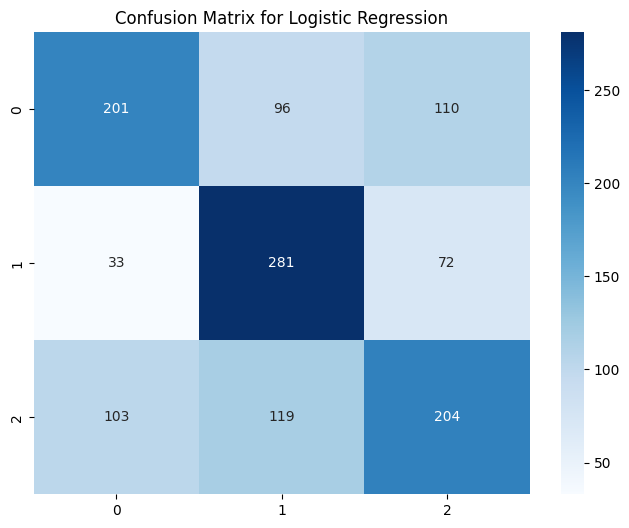

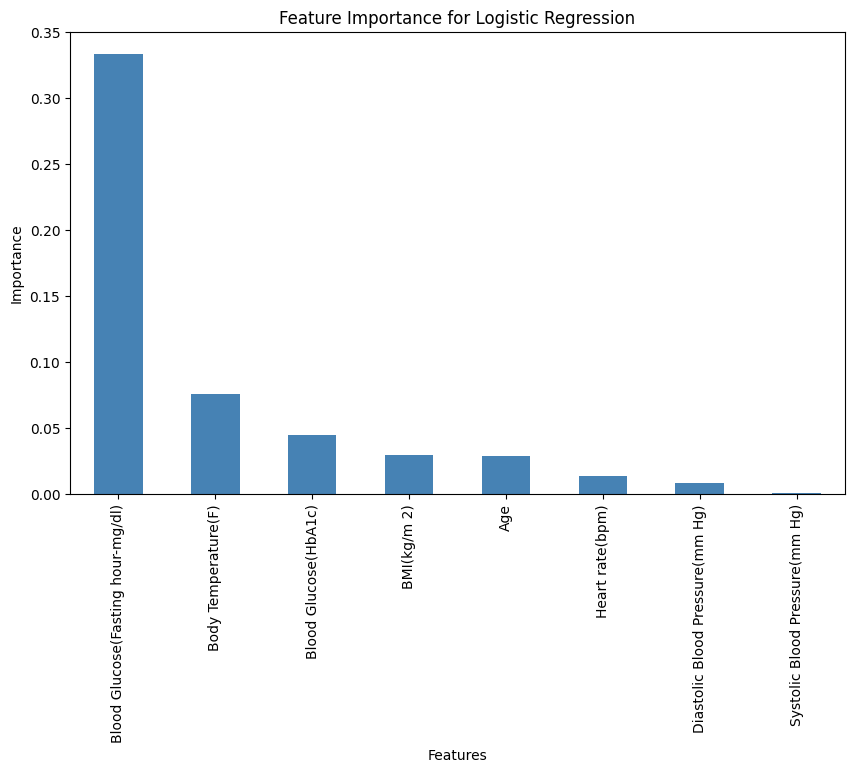

In [36]:
# 5. Logistic Regression

# Create and train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluation for Logistic Regression
print("Logistic Regression Classifier:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Feature coefficients for Logistic Regression
feature_importances_log_reg = pd.Series(log_reg_model.coef_[0], index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances_log_reg.sort_values(ascending=False).plot(kind='bar', color='steelblue')
plt.title('Feature Importance for Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


# Finding the suitable model

In [37]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Prepare the feature matrix and target vector
X = data[['Age', 'Body Temperature(F)', 'Heart rate(bpm)', 'Systolic Blood Pressure(mm Hg)', 
          'Diastolic Blood Pressure(mm Hg)', 'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 
          'Blood Glucose(Fasting hour-mg/dl)']]
y = data['Outcome']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature matrix
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Dictionary to store models and their names
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', use_label_encoder=False),  # `use_label_encoder` is deprecated
    'SVM': SVC(probability=True, random_state=42),  # Added `probability=True` for compatibility with `predict_proba()`
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Dictionary to store results
results = {}

# Train, test, and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train_encoded)
    
    # Predict on the training and test set
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate training and test accuracy
    train_accuracy = accuracy_score(y_train_encoded, y_train_pred) * 100
    test_accuracy = accuracy_score(y_test_encoded, y_test_pred) * 100
    
    # Store results
    results[model_name] = {
        'Train Accuracy (%)': f"{train_accuracy:.2f}%",
        'Test Accuracy (%)': f"{test_accuracy:.2f}%"
    }

# Convert results to a DataFrame for comparison
results_df = pd.DataFrame(results).T
print("\nComparison of Training and Testing Scores:")
print(results_df)


D:\python\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:41:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Comparison of Training and Testing Scores:
                    Train Accuracy (%) Test Accuracy (%)
Random Forest                  100.00%            99.18%
K-Nearest Neighbors             94.87%            91.80%
XGBoost                        100.00%            99.10%
SVM                             95.18%            94.34%
Logistic Regression             56.33%            56.36%


# Finally creating the Random forest model and evaluating with the user inputs.

In [38]:
#Crearting the Random forest model that takes the inputs from the user

import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Prepare the feature matrix and target vector
X = data[['Age', 'Body Temperature(F)', 'Heart rate(bpm)',
          'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
          'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
          'Blood Glucose(Fasting hour-mg/dl)']]  # Feature columns
y = data['Outcome']  # Target column

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Display unique values for debugging
print("Unique values in target column:", label_encoder.classes_)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the training data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Mapping for predictions (use label encoder's inverse transform)
risk_mapping = {idx: label for idx, label in enumerate(label_encoder.classes_)}

# Function to predict outcomes based on user input
def predict_outcome():
    while True:
        print("\nProvide the following details (or type 'exit' to stop):")
        try:
            # Collect user input for each feature
            user_input = input("Enter Age (or 'exit' to quit): ").strip()
            if user_input.lower() == "exit":
                print("Exiting the prediction system. Goodbye!")
                break

            user_data = [
                float(user_input),  # Age
                float(input("Enter Body Temperature (F): ")),
                float(input("Enter Heart Rate (bpm): ")),
                float(input("Enter Systolic Blood Pressure (mm Hg): ")),
                float(input("Enter Diastolic Blood Pressure (mm Hg): ")),
                float(input("Enter BMI (kg/m 2): ")),
                float(input("Enter Blood Glucose (HbA1c): ")),
                float(input("Enter Blood Glucose (Fasting hour-mg/dl): "))
            ]

            # Scale the user input
            user_data_scaled = scaler.transform([user_data])

            # Get predictions from the Random Forest model
            rf_pred = rf_model.predict(user_data_scaled)[0]

            # Ensure the prediction matches the mapping
            risk_label = risk_mapping.get(rf_pred, "Unknown risk")

            # Print the prediction
            print("\nPrediction (Random Forest Model):", risk_label)

            # Get prediction probabilities and display them in the order low, mid, high
            user_probs = rf_model.predict_proba(user_data_scaled)[0]
            ordered_classes = ['low risk', 'mid risk', 'high risk']
            ordered_probs = [user_probs[label_encoder.transform([cls])[0]] for cls in ordered_classes]

            # Print the ordered prediction probabilities
            for cls, prob in zip(ordered_classes, ordered_probs):
                print(f"Probability of {cls}: {prob:.2f}")

        except ValueError:
            print("Invalid input. Please enter numeric values for the fields.")
        except Exception as e:
            print(f"An error occurred: {e}")

# Run the prediction function
predict_outcome()


Unique values in target column: ['high risk' 'low risk' 'mid risk']

Provide the following details (or type 'exit' to stop):


Enter Age (or 'exit' to quit):  29
Enter Body Temperature (F):  98.6
Enter Heart Rate (bpm):  84
Enter Systolic Blood Pressure (mm Hg):  136
Enter Diastolic Blood Pressure (mm Hg):  80
Enter BMI (kg/m 2):  24.9
Enter Blood Glucose (HbA1c):  38
Enter Blood Glucose (Fasting hour-mg/dl):  4.5


D:\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Prediction (Random Forest Model): low risk
Probability of low risk: 1.00
Probability of mid risk: 0.00
Probability of high risk: 0.00

Provide the following details (or type 'exit' to stop):


Enter Age (or 'exit' to quit):  35
Enter Body Temperature (F):  98.6
Enter Heart Rate (bpm):  84
Enter Systolic Blood Pressure (mm Hg):  136
Enter Diastolic Blood Pressure (mm Hg):  80
Enter BMI (kg/m 2):  24.9
Enter Blood Glucose (HbA1c):  38
Enter Blood Glucose (Fasting hour-mg/dl):  4.5


D:\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Prediction (Random Forest Model): mid risk
Probability of low risk: 0.13
Probability of mid risk: 0.66
Probability of high risk: 0.21

Provide the following details (or type 'exit' to stop):


Enter Age (or 'exit' to quit):  18
Enter Body Temperature (F):  101
Enter Heart Rate (bpm):  85
Enter Systolic Blood Pressure (mm Hg):  140
Enter Diastolic Blood Pressure (mm Hg):  85
Enter BMI (kg/m 2):  23.7
Enter Blood Glucose (HbA1c):  40
Enter Blood Glucose (Fasting hour-mg/dl):  4.7


D:\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Prediction (Random Forest Model): high risk
Probability of low risk: 0.05
Probability of mid risk: 0.43
Probability of high risk: 0.52

Provide the following details (or type 'exit' to stop):


Enter Age (or 'exit' to quit):  21
Enter Body Temperature (F):  96
Enter Heart Rate (bpm):  101
Enter Systolic Blood Pressure (mm Hg):  142
Enter Diastolic Blood Pressure (mm Hg):  97
Enter BMI (kg/m 2):  20.3
Enter Blood Glucose (HbA1c):  39
Enter Blood Glucose (Fasting hour-mg/dl):  6.7


D:\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Prediction (Random Forest Model): mid risk
Probability of low risk: 0.00
Probability of mid risk: 0.90
Probability of high risk: 0.10

Provide the following details (or type 'exit' to stop):


Enter Age (or 'exit' to quit):  27
Enter Body Temperature (F):  98
Enter Heart Rate (bpm):  72
Enter Systolic Blood Pressure (mm Hg):  120
Enter Diastolic Blood Pressure (mm Hg):  80
Enter BMI (kg/m 2):  21
Enter Blood Glucose (HbA1c):  40
Enter Blood Glucose (Fasting hour-mg/dl):  5.7


D:\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Prediction (Random Forest Model): low risk
Probability of low risk: 0.51
Probability of mid risk: 0.46
Probability of high risk: 0.03

Provide the following details (or type 'exit' to stop):


Enter Age (or 'exit' to quit):  50
Enter Body Temperature (F):  98
Enter Heart Rate (bpm):  70
Enter Systolic Blood Pressure (mm Hg):  140
Enter Diastolic Blood Pressure (mm Hg):  85
Enter BMI (kg/m 2):  23
Enter Blood Glucose (HbA1c):  33
Enter Blood Glucose (Fasting hour-mg/dl):  4.7


D:\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Prediction (Random Forest Model): high risk
Probability of low risk: 0.08
Probability of mid risk: 0.27
Probability of high risk: 0.65

Provide the following details (or type 'exit' to stop):


Enter Age (or 'exit' to quit):  30
Enter Body Temperature (F):  98
Enter Heart Rate (bpm):  70
Enter Systolic Blood Pressure (mm Hg):  140
Enter Diastolic Blood Pressure (mm Hg):  85
Enter BMI (kg/m 2):  23.7
Enter Blood Glucose (HbA1c):  40
Enter Blood Glucose (Fasting hour-mg/dl):  5


D:\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Prediction (Random Forest Model): low risk
Probability of low risk: 0.51
Probability of mid risk: 0.46
Probability of high risk: 0.03

Provide the following details (or type 'exit' to stop):


Enter Age (or 'exit' to quit):  exit


Exiting the prediction system. Goodbye!
